# Recapitulacion de la Practica 2

## Cesar Gerardo Varela Cavazos

Para esta practica utilzaremos la base de datos de la venta de vinos. Por lo que se empezara con la lectura de la tabla para extraer su informacion y mostrarla mediante calculos y graficas. 

Iniciaremos con la importacion de las librerias:

In [1]:
#Importacion de las librerias
import numpy as np
import pandas_profiling
import pandas as pd
import matplotlib as plt

Para ls practica comenzaremos a entender todas las columnas que tiene de manera mas lejible, por lo que se mostrara todas las columnas de la base de datos con la finalidad de entender las columnas que tiene la tabla de vinos y dar un buen analisis. Por lo que a continuacion se visualizara las columnas de la base de datos.

In [2]:
df= pd.read_csv("Practica 2.csv")
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Una vez visualizado los nombres de las columnas de la base de datos y la infomracion comenzaremos a analizar el tipo de datos que tienen las columnas para entender con que columnas vamos a estar trabajando para visualizar las graficas y los calculos que tienen como la suma, calculos de la media, desviacion estandar, etc. 

A continuacion se mostrara los tipos de datos que tienen las columnas de la base de datos:


In [3]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Por lo que vemos nadamas las columnas que contenen valores numericos son las de 'points' y 'price', por lo que esas seran las tablas con las que trabajaremos para hacer los calculos y crear las graficas. Y muy poco la de 'province'.

Comenzaremos a realizar los calculos estadisticos de estas dos columnas, utilizando la funcion cumsum() para mostrar los acumulados de registro a registro correspondiente a cada columna para entender la distribicion de los datos y ver un total de puntos y precios de venta. Nadamas que para este caso solo se tomaran en cuenta 25 registros debdio a que contienen mas de 100,000 datos


In [4]:
df['points'].head(25).cumsum()

0       96
1      192
2      288
3      384
4      479
5      574
6      669
7      764
8      859
9      954
10    1049
11    1144
12    1239
13    1334
14    1429
15    1524
16    1619
17    1714
18    1809
19    1904
20    1999
21    2094
22    2189
23    2284
24    2379
Name: points, dtype: int64

In [5]:
df['price'].head(25).cumsum()

0      235.0
1      345.0
2      435.0
3      500.0
4      566.0
5      639.0
6      704.0
7      814.0
8      879.0
9      939.0
10    1019.0
11    1067.0
12    1115.0
13    1205.0
14    1390.0
15    1480.0
16    1805.0
17    1885.0
18    2175.0
19    2250.0
20    2274.0
21    2353.0
22    2573.0
23    2633.0
24    2678.0
Name: price, dtype: float64

### Descripcion estadistica estandar

En esta parte se realizara un analisis estadistico sobre las dos columnas mencionadas, las de puntos(points) y precio(price) de las ventas de los vinos. Para estos calculos se tomaran en cuenta todos los registros para saber como son los resultados mas en detalle.

Por lo que comenzaremos a calcular las medias de las columnas 'price' y 'points':


In [6]:
df['points'].median()

88.0

In [7]:
df['price'].median()

24.0

Tambien las desviaciones estandar de las columnas 'price' y 'points':

In [8]:
df['points'].std()

3.2223917589832167

In [9]:
df['price'].std()

36.32253619648552

### Aplicacion de las graficas

Para la utilizacion de las graficas comenzaremos a agrupar de la tabla de vinos, los puntos de venta de cada provincia. Como son demaciadas provincias en la base de datos, se tomaran solo 25 provincias que estaran ordenada de mayor a menor. Por lo que en la siguiente grafica se visualizaran las provincias que tienen mayor numero de venta de vino.

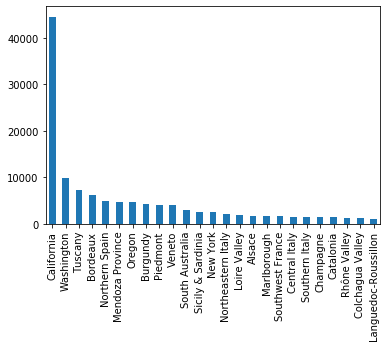

In [10]:
%matplotlib inline
df['province'].value_counts().head(25).plot.bar()

Como se ve en la grafica anterior, la provincia con mayor numero de venta es California. Concluyendo que la grafica de barras es muy util para realizar comparaciones entre varias columnas para determinar un objetivo en particula, si es obtener el menor dato de una columna o mayor. 

Despues comenzaremos a mostrar un histograma de como se distribuyen los valores de los precios de venta y determinar de manera visual los precios de venta que mas se repiten.


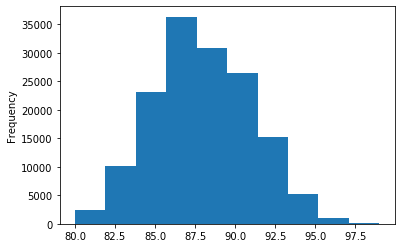

In [11]:
df[df['points'] < 100]['points'].plot.hist()

Por lo que se concluye que el mayor puntaje de venta obtenido de 100 datos de toda la muestra es entre el rango de 86-88. Y que el histograma para este tipo analisis podemos ver mas a detalle el comportamiento mas a detalle sobre una sola columna en particular.

Para la visualizacion de las graficas de Seaborn utilizaremos las librerias que se veran a continuacion, ya que debido a ellas dependera de la visualizacion de las graficas.

In [12]:
#Se importaran las librerias para utilizar las graficas de seaborn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

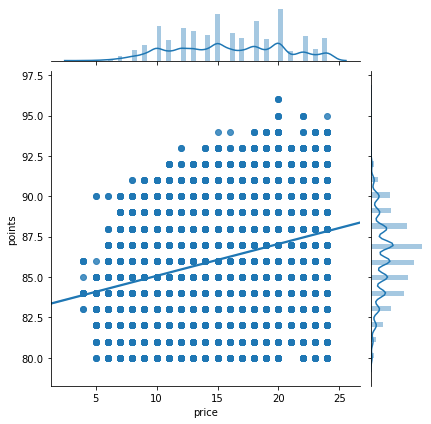

In [13]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 25], kind='reg')

Por lo que se ve que el precio va aumentando conforme aumente la calificacion que obtiene el vino, por lo que es algo logico ya que la calificacion que obtiene quiere decir que el vino es de mejor calidad y por eso el precio es tan elevado.

Ahora para hacer una visualizacion mas legible entre los datos, la informacion se visualizara en forma de hexagonos para entenderlo bien. 

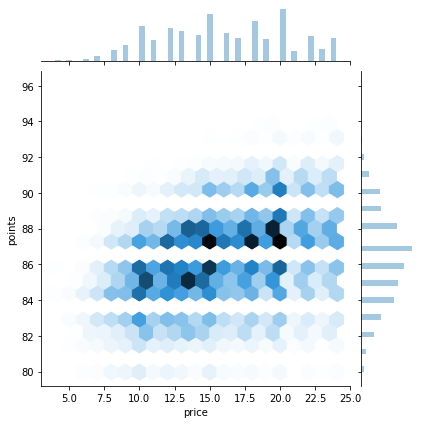

In [14]:
sns.jointplot(x='price', y='points', data=df[df['price'] < 25], kind='hex', gridsize=20)

Por ultimo se utilizara la grafica de pairplot(), para ver las interacciones que puedan haber entre las dos columnas que se van a manejar que son las de : 'price', 'points' y entender de manera legible como estan formados los datos en la grafica. A continuacion se mostrara un histograma de distribucion y graficos de dispersion para poder buscar una correlacion que hay entre la tabla de precios con la de punto de venta.

C:\Users\LIZETH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LIZETH\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


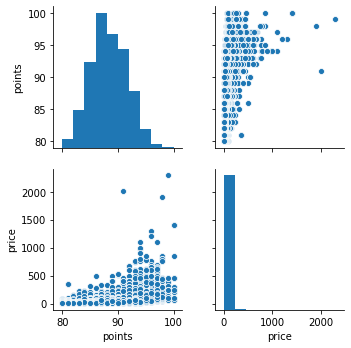

In [15]:
sns.pairplot(df[['points', 'price']])

Por lo que en esta grafica se concluye que hay una correlacion entre los precios y calificaciones de la venta de los vinos ya que en la primera mitad del grafico vemos que la calificacion obtenida por los vinos hace que su precio aumente; y en la segunda mitad del grafico observamos de igual manera que el precio del vino aumenta por la calidad que este tiene.

### Conclusiones generales de las graficas

Lo que yo concluyo al realizar estas graficas para hacer un analisis de la base de datos de la venta de vinos es que la provincia que mas venta de vino tiene es la de California de acuerdo a la primera grafica mostrada en la practica, por lo que ahi, decidi realizar un histograma de las calificaciones de los vinos para entender de una manera el porque se esta vendiendo mucho en una provincia en particular por la calificacion alta de venta. Ademas que con las ultimas graficas lo que se desea entender la razon por la cual entre mayor calificacion tenga el vino el precio aumentara lo cual es logico debido a que un producto que tenga mayor calidad y este muy completo, es logico que su precio sea alto. Y en la ultima grafica lo que se queria llegar es a entender la relacion que tiene la califacion de los vinos con el precio que tienen, que se concluye que van muy de la mano por su a lo que se tiene planteado que es a mayor sea la calificacion mayor sera el precio del vino.

# Practica 3

Para esta practica comenzaremos a instalar las librerias que vamos a necesitar en la computadora para la visualizar las graficas de letras 

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



Comenzamos a realizar pruebas

In [1]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer()
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LIZETH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LIZETH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LIZETH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


Ya echas las pruebas comenzamos a leer la base de datos de la practica 2 con otra variable para no tener problemas con lo que se hizo de la practica pasada

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
df_3 = pd.read_csv("Practica_.csv")

Con el siguiente comando visializaremos la imformacion de la nueva base de datos que usaremos que se llama: rev-solo.csv 

In [5]:
df_3.head(18)

,Unnamed: 0,country,description,variety
0,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Tinta de Toro
6,6,Spain,Slightly gritty black-fruit aromas include a s...,Tinta de Toro
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Tinta de Toro
8,8,US,This re-named vineyard was formerly bottled as...,Pinot Noir
9,9,US,The producer sources from two blocks of the vi...,Pinot Noir


Ya una vez de leer la base de datos, se trabajara on datos de interes, que en este caso sera: country, description, variety. 

In [6]:
header = ['country', 'description', 'variety']
df_3.to_csv('Practica_.csv', columns = header)
df_2 = pd.read_csv('Practica_.csv')
df_2.head(10)

,Unnamed: 0,country,description,variety
0,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Tinta de Toro
6,6,Spain,Slightly gritty black-fruit aromas include a s...,Tinta de Toro
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Tinta de Toro
8,8,US,This re-named vineyard was formerly bottled as...,Pinot Noir
9,9,US,The producer sources from two blocks of the vi...,Pinot Noir


Una vez que tengamos todas las columnas con las que vamos a trabajar. Lo que sigue ahora saber todos los datos unicos de la columna "country"

In [7]:
df_2['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

Ahora se creara otra base de datos que contendra las tres columnas ya mencionadas para empezar con la visualizacion de las graficas

In [8]:
df_2.to_csv('Datos.csv', index=False)
read = pd.read_csv('Datos.csv')
read.head(7)

,Unnamed: 0,country,description,variety
0,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Tinta de Toro
6,6,Spain,Slightly gritty black-fruit aromas include a s...,Tinta de Toro


In [9]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
pr = pd.read_csv('Datos.csv', header = None)
pr.head(7)

C:\Users\LIZETH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3
0,Unnamed: 0,country,description,variety
1,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
2,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
3,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
4,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
5,4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
6,5,Spain,"Deep, dense and pure from the opening bell, th...",Tinta de Toro


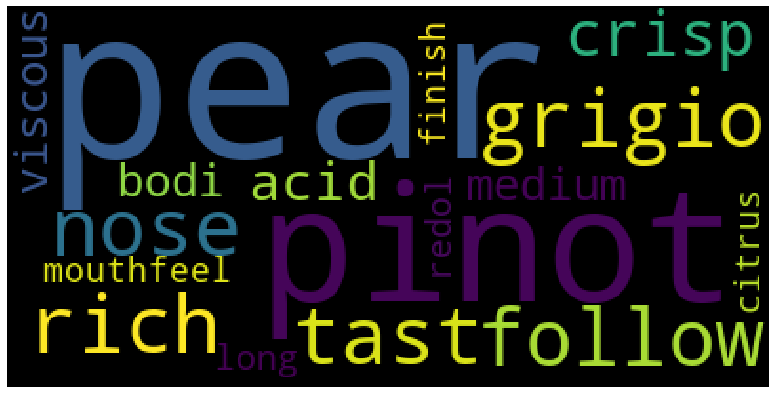

In [17]:
pr.columns = ['Unnamed: 0','country', 'description' ,'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
reemplazos.append(reemplazo)
#pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Con la grafica pasada podemos observar que en la experimentacion hecha por la base de datos: 'Datos.csv', observamos que se estan concentrado los tipos de sabores de los vinos.Ahorra comenzaremos a trabajar son los sabores de los vinos por, pais, por lo que se seleccionaaran tres paises a la zar.

Por lo que se filtrar Egipto para saber los sabores que tiene para identificar los sabores que tiene.

In [19]:
header = ['description','country',  'variety']
writer = df_2[df_2['country'] == 'Egypt']
writer.to_csv('Egipto.csv', columns = header, index=False)

lol = pd.read_csv('Egipto.csv')
lol.head(7)

,description,country,variety
0,"Ripe pear, apple and tropical fruit in the nos...",Egypt,Grenache
1,"This fresh, approachable Chenin starts with br...",Egypt,Chenin Blanc
2,"The character of this feminine, aromatic Viogn...",Egypt,Viognier


Ahora con Francia

In [20]:
header = ['description','country',  'variety']
writer = df_2[df_2['country'] == 'France']
writer.to_csv('Francia.csv', columns = header, index=False)

lol = pd.read_csv('Francia.csv')
lol.head(7)

,description,country,variety
0,"This is the top wine from La Bégude, named aft...",France,Provence red blend
1,This wine is in peak condition. The tannins an...,France,Tannat
2,Coming from a seven-acre vineyard named after ...,France,Malbec
3,"Pale in color, this is nutty in character, wit...",France,Sparkling Blend
4,Gingery spice notes accent fresh pear and melo...,France,Rhône-style White Blend
5,"Dark in color and in flavor profile, this medi...",France,Syrah
6,"This structured, complex Chardonnay is packed ...",France,Chardonnay


Y con Brasil

In [22]:
header = ['description','country',  'variety']
writer = df_2[df_2['country'] == 'Brazil']
writer.to_csv('Brasil.csv', columns = header, index=False)

lol = pd.read_csv('Brasil.csv')
lol.head(7)

,description,country,variety
0,"Cherry, plum and earth aromas form a sound bou...",Brazil,Merlot
1,"Taut, dense and ripe, this 50/50 blend of Cabe...",Brazil,Cabernet Sauvignon-Merlot
2,"Overly earthy, but ripe and concentrated with ...",Brazil,Red Blend
3,A blend of 60% Cabernet Sauvignon and 40% Merl...,Brazil,Cabernet Sauvignon-Merlot
4,An earthy blend of Cabernet Sauvignon and Merl...,Brazil,Cabernet Sauvignon-Merlot
5,"Simple but pleasing, with high-toned strawberr...",Brazil,Merlot
6,There's some density here but also rustic scen...,Brazil,Cabernet Sauvignon


Por lo que se visualizara las tres graficas de letras de los sabores de vinos, de los tres paises mencionados. 

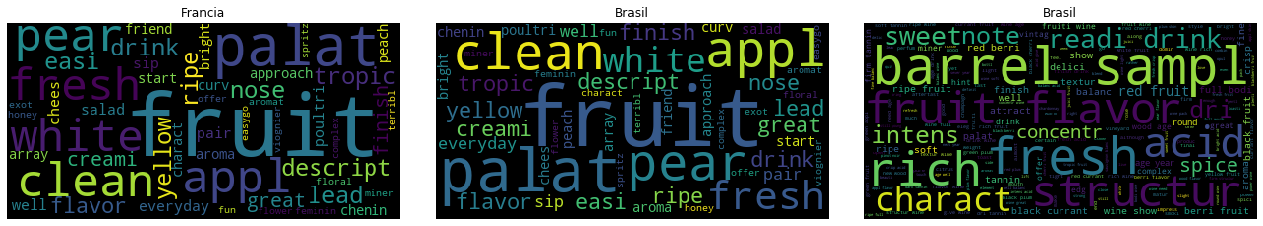

In [23]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
egipto = pd.read_csv("Egipto.csv", header = None)
francia = pd.read_csv("Francia.csv", header = None)
brasil = pd.read_csv("Brasil.csv", header = None)
cols = ['description', 'country', 'variety']
egipto.columns = cols
francia.columns = cols
brasil.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Egipto", "Francia", "Brasil"]
i = 1
for d in [egipto, francia, brasil]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

Con las tres graficas moestradas, lo que se concluye que cada pais tiene una distribucion de sabor diferente, a lo mejor por el tipo de demanda que tiene el pais.